# **Customer Segmentation with K-Means Clustering based on RFM Model**

## **Table of Contents**
 1. [Introduction](#Introduction) <br>
 2. [Data Understanding](#Data-Understanding) <br>
 3. [Data Pre-processing](#Data-Pre-processing) <br>
 4. [Exploratory Data Analysis](#Exploratory-Data-Analysis) <br>
 5. [RFM Analysis](#RFM-Analysis) <br>
 6. [K-Means Clustering on RFM Values](#K-Means-Clustering-on-RFM-Values) <br>
 7. [Results](#Results) <br>
 8. [Conclusion](#Conclusion) <br>
 9. [Recommendations](#Recommendations) <br>

## **Introduction**

This project aims to divide customers into segments based on RFM method and K-Means Clustering Model, which in turn creates tailored marketing strategies according to the customer behavior, characteristics, and needs.

## **Importing Required Libraries**

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D

## **Data Understanding**

The dataset contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. It can be found here and the attributes are as follows.

**InvoiceNo:** Invoice number, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.<br>
**StockCode:** Product (item) code, a 5-digit integral number uniquely assigned to each distinct product.<br>
**Description:** Product (item) name. <br>
**Quantity:** The quantities of each product (item) per transaction<br>
**InvoiceDate:** Invice Date and time, the day and time when each transaction was generated.<br>
**UnitPrice:** Unit price, Product price per unit in sterling.<br>
**CustomerID:** Customer number, a 5-digit integral number uniquely assigned to each customer.<br>
**Country:** Country name, the name of the country where each customer resides.<br>

In [11]:
#reading the "Online_Retail" dataset
df=pd.read_excel("online_retail.xlsx")

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
#exploring the data types of columns and the number of entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


The dataset comprises 541909 rows and 8 columns. The data types of columns are proper to the description of columns, so there is no need to make any type and format changes.

## **Data Pre-processing**

#### **Missing Value Handling**

In [16]:
#checking how many missing values do we have 
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

As it is seen, there are missing values in the columns "Description" and "CustomerID". The "Description" column will not be included in further analysis, so we will handle the missing values in the "CustomerID" column by dropping the records for retail data customer segmentation."

In [17]:
#dropping Null records
df.dropna(subset='CustomerID',inplace=True)

In [18]:
df['CustomerID'].isnull().sum()

0

In [19]:
df.shape

(406829, 8)

Great! We're done with the missing values.

#### **Adding New Attribute "Sales" to the Dataset**

In [20]:
#creating a column to calculate total sales value for each transaction
df['Sales'] = round(df['Quantity'] * df['UnitPrice'],2)

#### **Excluding return transactions**

In [23]:
#removing the negative transactions which mean return goods
df_retail=df[df["Sales"]>0]

In [24]:
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [25]:
df_retail.shape

(397880, 9)

#### **Reformatting column "InvoiceDate"**

In [61]:
# Extract day, month and year from InvoiceDate column into a new column InvoiceDay
df_retail['InvoiceDay'] = df_retail["InvoiceDate"].apply(lambda x: datetime(x.year, x.month, x.day))

C:\Users\Övgü\AppData\Local\Temp\ipykernel_17672\874772141.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


We're all set. Now, Let's jump into it!

## **Exploratory Data Analysis**

#### **Descriptive Statistics**

In [281]:
df_retail[["Quantity","UnitPrice"]].describe()

,Quantity,UnitPrice
count,397880.000000,397880.000000
mean,12.988358,3.116519
std,179.332672,22.097986
min,1.000000,0.040000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


#### **What is the number of unique Customers, Stock Code, Description, Invoice No, and Invoice Date ?**

In [185]:
#finding unique numbers of attributes
df_retail.nunique()

InvoiceNo      18532
StockCode       3664
Description     3876
Quantity         301
InvoiceDate    17282
UnitPrice        439
CustomerID      4338
Country           37
Sales           2698
dtype: int64

We get a convenient result except for the number of StockCode and Description, which do not match each other. StockCode uniquely identifies the description of a product. In that sense, they should be equal to each other. Let's find the reason behind it.

In [227]:
#finding out the StokCodes which have more than 1 Description
df_unique=df_retail.groupby(["StockCode"]).nunique().reset_index()
df_unique=df_unique[df_unique["Description"]>1][["StockCode","Description"]].sort_values(by=["Description"],ascending=False)
df_unique.head()

,StockCode,Description
1996,23236,4
1956,23196,4
1991,23231,3
2110,23366,3
2114,23370,3


In [226]:
#selecting one of the StockCodes to analyze in detailed
df_retail[df_retail["StockCode"]==23231]["Description"].unique()

array(['WRAP DOILEY DESIGN', 'WRAP  VINTAGE DOILEY ',
       'WRAP  VINTAGE DOILY '], dtype=object)

As a result, the discrepancy in the "Description" column won't affect our RFM analysis and can be left as it is.

#### **How many orders were cancelled ?**

In [262]:
#finding the percentage of cancelled orders
cancelled_orders=df[df["Sales"]<0]["InvoiceNo"].nunique()
total_orders=df["InvoiceNo"].nunique()
print("Number of cancelled orders :", cancelled_orders) 
print("Percentage of cancelled orders : {:.2f}%".format(cancelled_orders/total_orders*100))

Number of cancelled orders : 3654
Percentage of cancelled orders : 16.47%


It is a better approach to elaborate on the reason behind the cancellation of orders to provide leveraged services.

#### **What are the top 10 countries with the highest Sales ?**

In [282]:
df_top=df_retail.groupby(by=["Country"])
df_top=df_top.agg({"Sales":["sum"]})
df_top.columns = df_top.columns.droplevel(1)  
df_top.sort_values(by=['Sales'],ascending=False,inplace=True)
df_top=df_top.reset_index().head(10)
df_top

,Country,Sales
0,United Kingdom,7308391.55
1,Netherlands,285446.34
2,EIRE,265545.90
3,Germany,228867.14
4,France,209024.05
5,Australia,138521.31
6,Spain,61577.11
7,Switzerland,56443.95
8,Belgium,41196.34
9,Sweden,38378.33


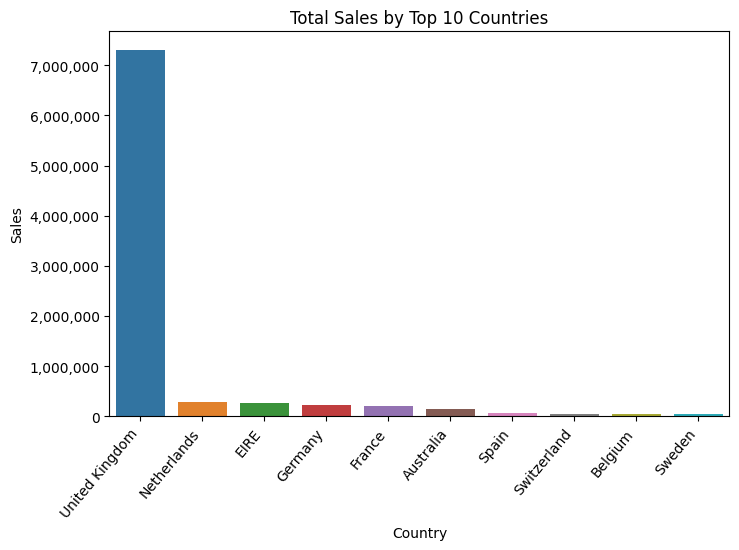

In [283]:
fig, ax = plt.subplots(figsize=(8,5))
ax=sns.barplot(x='Country', y='Sales', data=df_top, estimator=max, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Total Sales by Top 10 Countries")
plt.show()

Unsurprisingly, as a UK-based online retail company, the United Kingdom is a leader in terms of total sales.

#### **What are the top 10 countries with the highest number of customers ?**

In [284]:
df_top=df_retail.groupby(by=["Country"])["CustomerID"].nunique()
df_top=df_top.sort_values(ascending=False).head(10)
df_top


Country
United Kingdom    3920
Germany             94
France              87
Spain               30
Belgium             25
Switzerland         21
Portugal            19
Italy               14
Finland             12
Austria             11
Name: CustomerID, dtype: int64

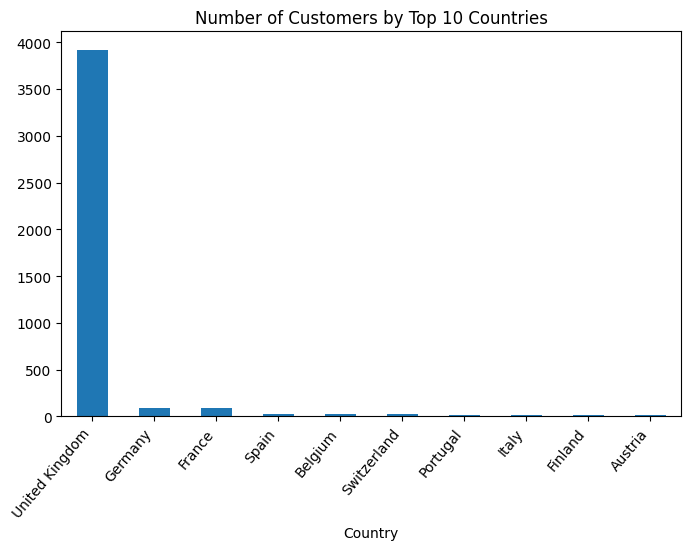

In [285]:
fig, ax = plt.subplots(figsize=(8,5))
df_top.plot(kind="bar",x="Country")
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.title("Number of Customers by Top 10 Countries")
plt.show()

Similarly, the United Kingdom has the highest number of customers compared to the other countries.

We are ready to continue with RFM Analysis !

## **RFM Analysis**

The first thing we are going to do is to start with **RFM (Recency, Frequency, Monetary) Analysis** , which is a customer segmentation technique for analyzing customer value based on past buying behavior and then combine our results with **K-Means Clustering Algorithm.**

#### **Feature Engineering**

The next question is what are the metrics for RFM Analysis? RFM Analysis stands for Recency, Frequency, and Monetary Analysis, and their descriptions of them are given as follows.

**• Recency:** The time since last order with the product of customers.

**• Frequency:** The total number of transaction  between the customer’s invoice date and reference day.

**• Monetary:** The total transaction value of customers.

In [63]:
#finding the last invoice day + 1 in a new variable to calculate Recency
reference_day=df_retail["InvoiceDay"].max()+timedelta(1)

In [64]:
# calculating RFM values for each transaction and save them in a new dataframe "rfm"
rfm = df_retail.groupby('CustomerID').agg({
    'InvoiceDay' : lambda x: (reference_day - x.max()).days,
    'InvoiceNo' : 'count', 
    'Sales' : 'sum'})
# rename the columns
rfm.rename(columns = {'InvoiceDay' : 'Recency', 
                      'InvoiceNo' : 'Frequency', 
                      'Sales' : 'Monetary'}, inplace = True)

rfm.head(6)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
12352.0,37,85,2506.04


Here is the result table of RFM values for each customer. Now, we are going to divide customers into segments based on RFM quartiles.

#### **Customer Segmentation based on RFM Quartiles**

In [65]:
#finding quantiles of RFM attributes
quantiles=rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,18.00,17.0,307.415
0.50,51.00,41.0,674.485
0.75,142.75,100.0,1661.740


In [67]:
#assigning Recency Score from 1 to 4 to the customers 
def rec_score(x):
    if x<=18:
        return 4
    elif x<=51:
        return 3
    elif x<=142.75:
        return 2
    else:
        return 1

In [68]:
#assigning Frequency Score from 1 to 4 to the customers 
def freq_score(x):
     if x<=17:
        return 1
     elif x<=41:
        return 2
     elif x<=100:
        return 3
     else:
        return 4

In [69]:
#assigning Monetary Score from 1 to 4 to the customers 
def mon_score(x):
      if x<=307.415:
        return 1
      elif x<=674.485:
        return 2
      elif x<=1661.74:
        return 3
      else:
        return 4

In [70]:
#create segmentation table 
rfm_segmentation=rfm.copy()
rfm_segmentation["R"]=rfm_segmentation["Recency"].apply(rec_score)
rfm_segmentation["F"]=rfm_segmentation["Frequency"].apply(freq_score)
rfm_segmentation["M"]=rfm_segmentation["Monetary"].apply(mon_score)

In [71]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,4
12347.0,3,182,4310.00,4,4,4
12348.0,76,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,311,17,334.40,1,1,2


What will happen next is we will find RFM segments and total scores to allocate the RFM groups.

In [72]:
# Concatenate & sum up the three columns
rfm_segmentation['RFM_Segment'] = rfm_segmentation["R"].map(str) + rfm_segmentation["F"].map(str) + rfm_segmentation["M"].map(str)
rfm_segmentation["RFM_Score"] = rfm_segmentation[['R', 'F', 'M']].sum(axis = 1)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6
12347.0,3,182,4310.00,4,4,4,444,12
12348.0,76,31,1797.24,2,2,4,224,8
12349.0,19,73,1757.55,3,3,4,334,10
12350.0,311,17,334.40,1,1,2,112,4


Now, it is time to end up with RFM groups. We will select 4 group names which are High Value, Loyal, At risk and Lost.

In [73]:
# Assigning RFM Groups based on RFM score 
rfm_labels=['Lost', 'At_risk', 'Loyal', 'High_value']
rfm_groups=pd.qcut(rfm_segmentation["RFM_Score"],q=4,labels=rfm_labels)
rfm_segmentation["RFM_Group"]=rfm_groups.values
rfm_segmentation.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Group
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,At_risk
12347.0,3,182,4310.00,4,4,4,444,12,High_value
12348.0,76,31,1797.24,2,2,4,224,8,Loyal
12349.0,19,73,1757.55,3,3,4,334,10,Loyal
12350.0,311,17,334.40,1,1,2,112,4,Lost


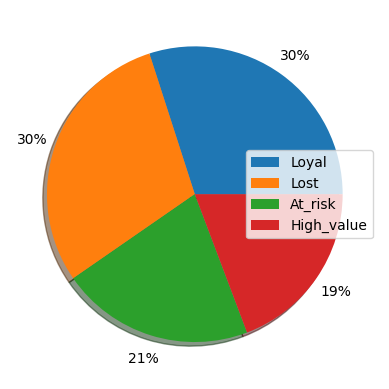

In [74]:
#the distribution of RFM Groups
rfm_pie=rfm_segmentation["RFM_Group"].value_counts()
plt.pie(rfm_pie,autopct="%1.0f%%",labels=None,pctdistance=1.16,shadow=True)
plt.legend(rfm_pie.index,loc="right")

Lost and Loyal customers comprise %60 of customers. We can create different campaigns for each targeted group. However, before we decide what to do, let's take a look at K-Means Clustering Algorithm on RFM values and compare the results.

## **K-Means Clustering on RFM Values**

K-Means clustering is one of the distance-based and unsupervised machine learning algorithms. It partitions the data points into k clusters based on the Euclidean Distance used for the clustering. It is sensitive to skewness and outliers, which can cause the clusters to be distorted and lead to inaccuracies in the results. In this manner, log transform can be used to turn a skewed distribution into a normal or less-skewed. Following this, normalization is required to prevent one attribute outweighs another one in terms of the scales. Finally, before applying the K-Means Clustering algorithm, the optimum number of k should be defined. The two ways of defining the number of clusters in this dataset are as follows:<br>

• Elbow Method<br>
• Silhouette Method<br>

First, let's check the distribution of RFM values to decide whether a log transform is needed or not. 

In [76]:
#checking descriptive statistics
rfm.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,93.059474,91.719686,2054.266459
std,100.012264,228.785240,8989.230441
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,307.415000
50%,51.000000,41.000000,674.485000
75%,142.750000,100.000000,1661.740000
max,374.000000,7847.000000,280206.020000


#### **Visualization of Distribution of RFM Values**

Text(0.5, 0.98, 'Histograms of Each RFM Value')

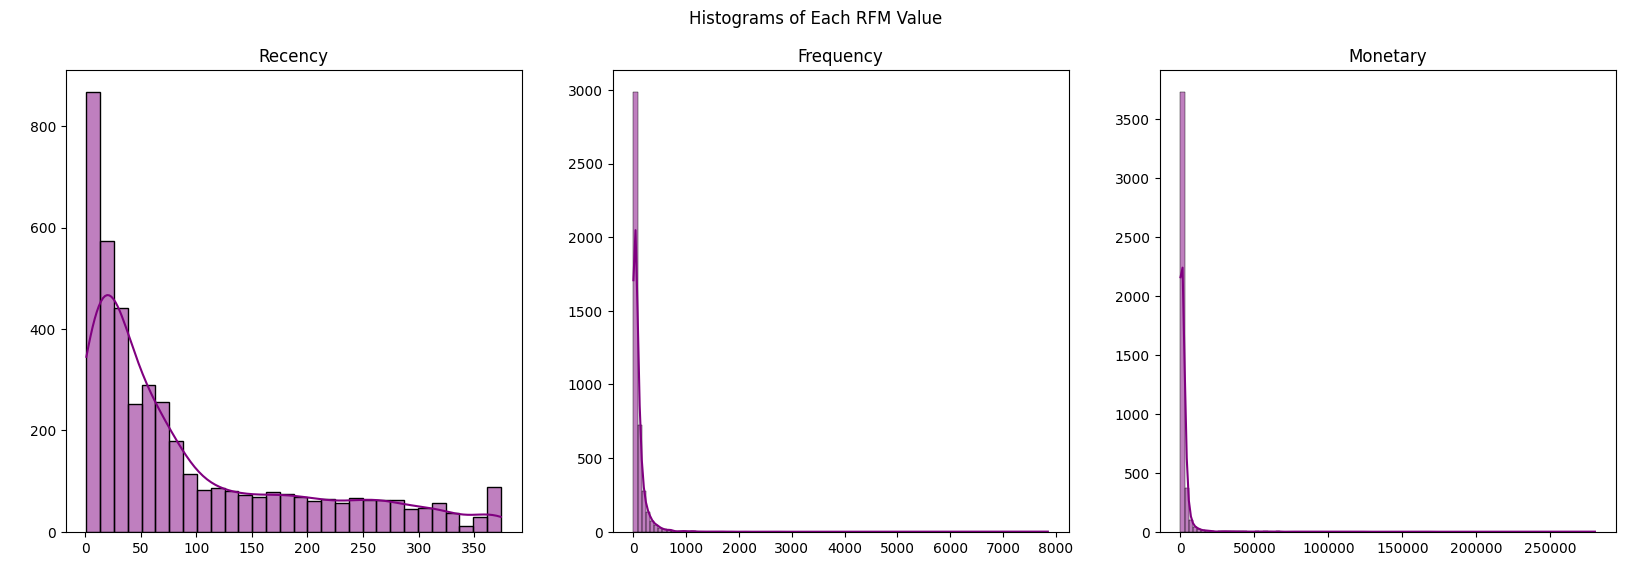

In [192]:
#creating histograms for each attribute
fig, ax = plt.subplots(1,3, figsize=(20,6))
sns.histplot(data=rfm,x="Recency",color="purple",bins=30,kde=True,ax=ax[0])
sns.histplot(data=rfm,x="Frequency",color="purple",bins=100,kde=True,ax=ax[1])                                                                        
sns.histplot(data=rfm,x="Monetary",color="purple",bins=100,kde=True,ax=ax[2])

cols=rfm.columns[0:3]
i=0

for col in cols:
    ax[i].set_xlabel(" ")
    ax[i].set_ylabel(" ")
    ax[i].set_title(col)
    
    i=i+1

fig.suptitle("Histograms of Each RFM Value")

As it can be clearly seen that RFM attributes are highly skewed. The log transformation will be used to transform skewed data to approximately conform to normality.

#### **RFM Values Log Transform**

In [132]:
#unskew RFM attributes with log transformations
rfm_log = rfm.apply(np.log, axis = 1).round(2)
rfm_log.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.79,0.00,11.25
12347.0,1.10,5.20,8.37
12348.0,4.33,3.43,7.49
12349.0,2.94,4.29,7.47
12350.0,5.74,2.83,5.81


To prevent one attribute outweighs the other, let's normalize the data.

#### **RFM Values Normalization**

In [139]:
#scaling RFM attributes
scaler=StandardScaler()
rfm_scale=scaler.fit_transform(rfm_log)

#storing into a dataframe
rfm_scale=pd.DataFrame(rfm_scale,index=rfm_log.index,columns=rfm_log.columns)
rfm_scale.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,1.437782,-2.775082,3.695559
12347.0,-1.952409,1.146660,1.411198
12348.0,0.382413,-0.188241,0.713199
12349.0,-0.622355,0.460355,0.697335
12350.0,1.401639,-0.640750,-0.619345


Text(0.5, 0.98, 'Histograms of Each RFM Value')

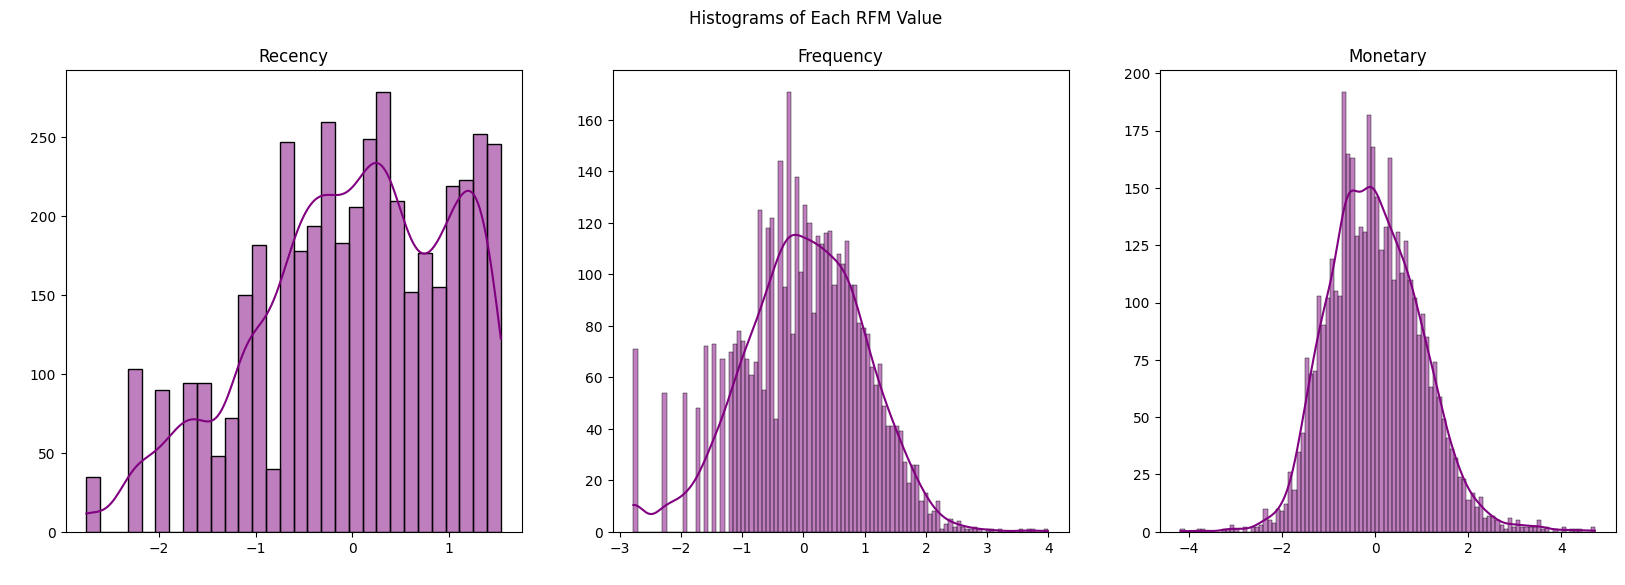

In [193]:
#creating histograms for each attribute
fig, ax = plt.subplots(1,3, figsize=(20,6))
sns.histplot(data=rfm_scale,x="Recency",color="purple",bins=30,kde=True,ax=ax[0])
sns.histplot(data=rfm_scale,x="Frequency",color="purple",bins=100,kde=True,ax=ax[1])                                                                        
sns.histplot(data=rfm_scale,x="Monetary",color="purple",bins=100,kde=True,ax=ax[2])

cols=rfm.columns[0:3]
i=0

for col in cols:
    ax[i].set_xlabel(" ")
    ax[i].set_ylabel(" ")
    ax[i].set_title(col)
    
    i=i+1

fig.suptitle("Histograms of Each RFM Value")

By using the log transform method, we get an almost normal distribution in Frequency and Monetary. On the other hand, the distribution of Recency turns into a less-skewed one.

#### **Determining Optimum Number of Clusters**

We will analyze two methods to find the optimum number of clusters and compare the results.

##### **Elbow Method**

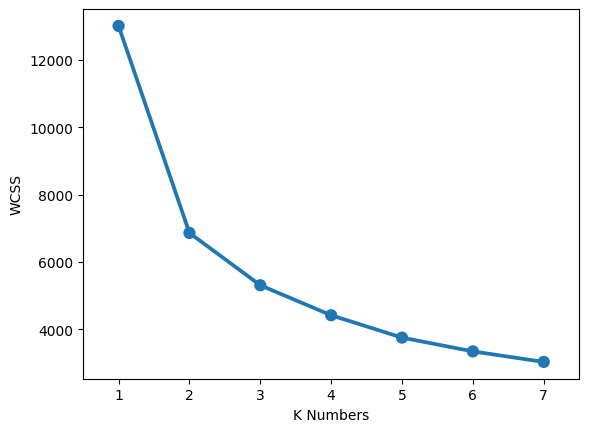

In [142]:
# find the optimum number of clusters (k) using the Elbow method
wcss = {}
for k in range(1, 8):
    kmeans = KMeans(n_clusters= k)
    kmeans.fit(rfm_scale)
    wcss[k] = kmeans.inertia_
    
# plot the WCSS values
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('K Numbers')
plt.ylabel('WCSS')
plt.show()

##### **Silhouette Method**

In [146]:
# find the optimum number of clusters (k) using the Silhouette method
for n_clusters in range(2,8):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(rfm_scale)
    clusters = kmeans.predict(rfm_scale)
    silhouette_avg = silhouette_score(rfm_scale, clusters)
    
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.3952120331581569
For n_clusters = 3 The average silhouette_score is : 0.30297835176617605
For n_clusters = 4 The average silhouette_score is : 0.30255864997164317
For n_clusters = 5 The average silhouette_score is : 0.2788138650590769
For n_clusters = 6 The average silhouette_score is : 0.27583919558321074
For n_clusters = 7 The average silhouette_score is : 0.2641472714288767


By considering both methods, k=3 is selected as an optimum cluster number for k-means clustering algorithm.

#### **Customer Segmentation based on K-Means Clusters**

In [149]:
# clustering
clus = KMeans(n_clusters= 3)
clus.fit(rfm_scale)

# assigning the clusters to rfm_segmentation
rfm_segmentation['K_Cluster'] = clus.labels_
rfm_segmentation.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Group,K_Cluster
CustomerID,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,At_risk,0
12347.0,3,182,4310.00,4,4,4,444,12,High_value,2
12348.0,76,31,1797.24,2,2,4,224,8,Loyal,0
12349.0,19,73,1757.55,3,3,4,334,10,Loyal,0
12350.0,311,17,334.40,1,1,2,112,4,Lost,1


We are almost done. Now, we will compare RFM Groups and K-Means Clusters.

## **Results**

#### **Visualization of K-Means Clusters**

In [151]:
# joining RFM groups with K-means Clusters 
rfm_scale['K_Cluster'] = clus.labels_
rfm_scale['RFM_Group'] = rfm_segmentation.RFM_Group
rfm_scale.reset_index(inplace = True)
rfm_scale.head()

,CustomerID,Recency,Frequency,Monetary,K_Cluster,RFM_Group
0,12346.0,1.437782,-2.775082,3.695559,0,At_risk
1,12347.0,-1.952409,1.146660,1.411198,2,High_value
2,12348.0,0.382413,-0.188241,0.713199,0,Loyal
3,12349.0,-0.622355,0.460355,0.697335,0,Loyal
4,12350.0,1.401639,-0.640750,-0.619345,1,Lost


Text(0.5, 0.98, 'Scatter Plots of K-Means Clusters')

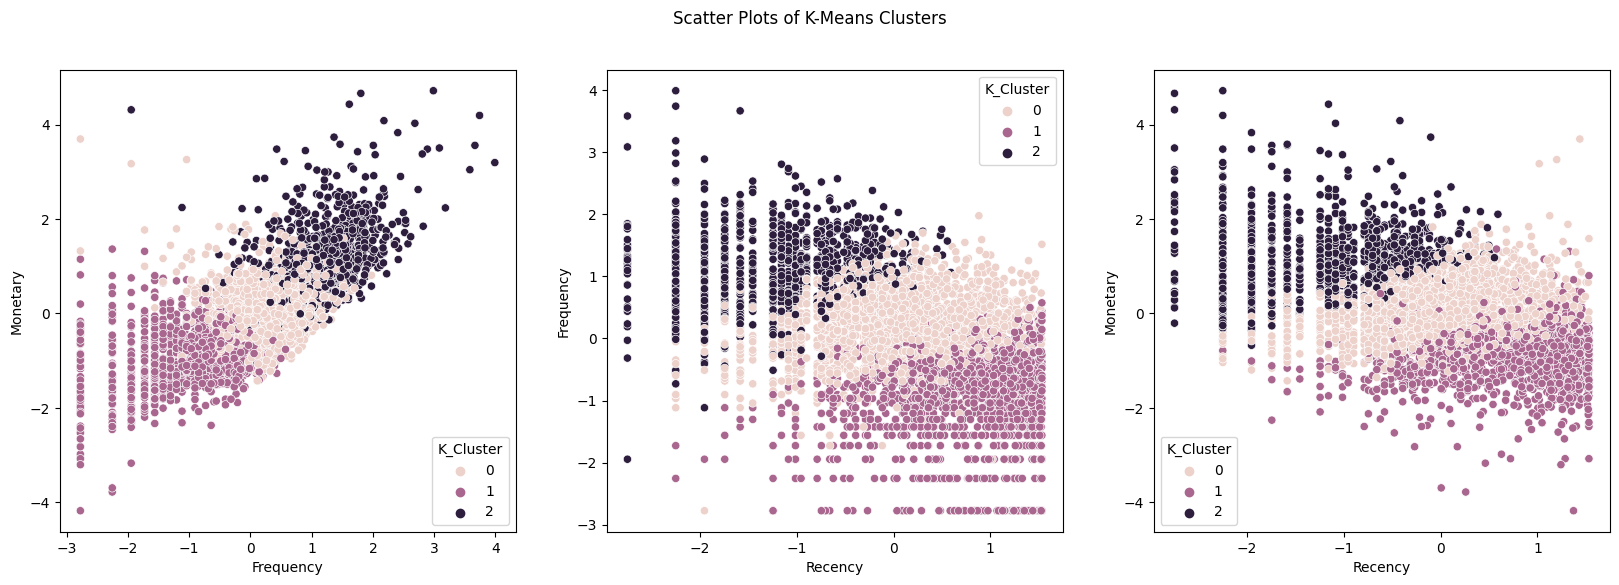

In [198]:
# visualizing K Clusters with RFM Values
fig, ax = plt.subplots(1,3, figsize=(20,6))
sns.scatterplot(x = rfm_scale["Frequency"], y = rfm_scale["Monetary"], hue = rfm_scale["K_Cluster"],ax=ax[0])
sns.scatterplot(x = rfm_scale["Recency"], y = rfm_scale["Frequency"], hue = rfm_scale["K_Cluster"],ax=ax[1])
sns.scatterplot(x = rfm_scale["Recency"], y = rfm_scale["Monetary"], hue = rfm_scale["K_Cluster"],ax=ax[2])
fig.suptitle("Scatter Plots of K-Means Clusters")

#### **Visualization of RFM Groups**

Text(0.5, 0.98, 'Scatter Plots of RFM Groups')

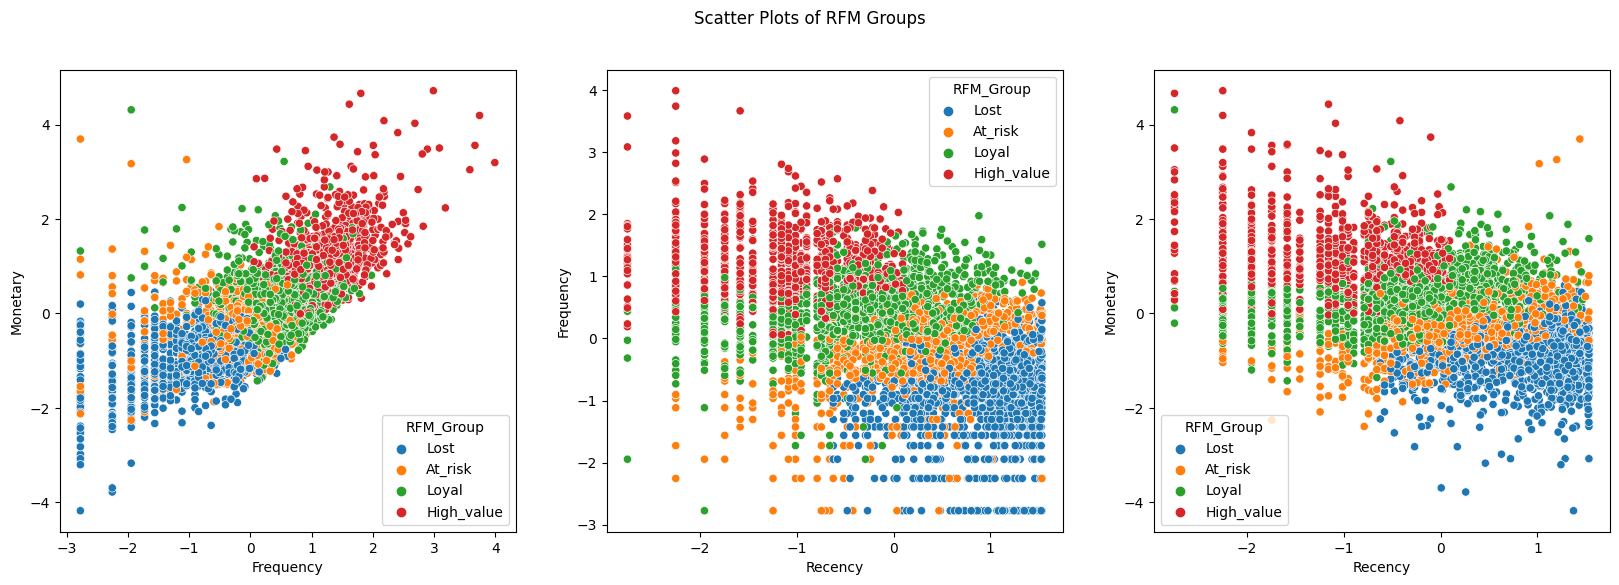

In [197]:
# visualizing RFM Groups across RFM Values
fig, ax = plt.subplots(1,3, figsize=(20,6))
sns.scatterplot(x = rfm_scale["Frequency"], y = rfm_scale["Monetary"], hue = rfm_scale["RFM_Group"],ax=ax[0])
sns.scatterplot(x = rfm_scale["Recency"], y = rfm_scale["Frequency"], hue = rfm_scale["RFM_Group"],ax=ax[1])
sns.scatterplot(x = rfm_scale["Recency"], y = rfm_scale["Monetary"], hue = rfm_scale["RFM_Group"],ax=ax[2])
fig.suptitle("Scatter Plots of RFM Groups")

When comparing RFM groups and K-Means Clusters, we can clearly see that 3 K-Means Clusters are more distinctive. It is better to run marketing campaigns with 3 clusters and we can also take a look at a 3D scatter plot of RFM values with 3 K-clusters to get a better picture.

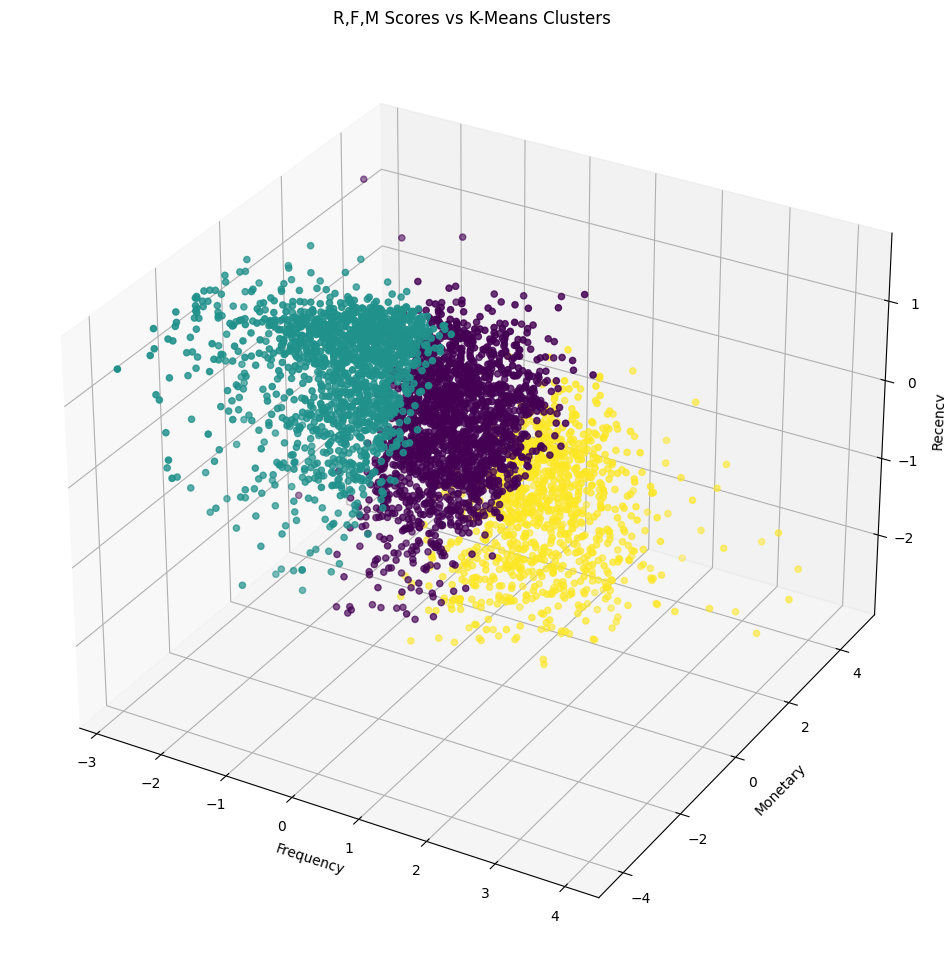

In [199]:
# 3D scatter plot of R, F & M values with the 3 K_Clusters
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_scale["Frequency"], rfm_scale["Monetary"], rfm_scale["Recency"], c = rfm_scale["K_Cluster"])
ax.set_xlabel("Frequency")
ax.set_ylabel("Monetary")
ax.set_zlabel("Recency")
ax.set_title("R,F,M Scores vs K-Means Clusters")

plt.show()

Finally, we have three distinctive clusters!

## **Conclusion**

• Cluster 2 is the high value customers with the highest number of orders, frequency and the most recent transactions.<br>
• Cluster 1 is the lost customers who rarely place orders with the lowest amount of sales.<br>
• Cluster 0 encompasses at risk and loyal customers with medium value of frquency, recency and monetary.<br>
• High monetary value is correlated with high frequency of orders and more recent ones in all clusters.<br>

## **Recommendations**

The company can create different marketing campaigns for the customer segments to grow revenue based on online retailer policies. In that sense, the company can offer incentives to low-value customers to keep them engaged and increase their frequency of orders. On the other hand, they can offer privileges such as exclusive discounts and early access to new products. Overall, it depends on what the company's business goal is.<br>